In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/Python for Data Analysis/Datasets/Sales_AtliQ/customers.csv')
date = pd.read_csv('/content/drive/MyDrive/Python for Data Analysis/Datasets/Sales_AtliQ/date.csv')
markets = pd.read_csv('/content/drive/MyDrive/Python for Data Analysis/Datasets/Sales_AtliQ/markets.csv')
products = pd.read_csv('/content/drive/MyDrive/Python for Data Analysis/Datasets/Sales_AtliQ/products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Python for Data Analysis/Datasets/Sales_AtliQ/transactions.csv')

Cleaning Transactions Table

In [ ]:
transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR


In [ ]:
#We can see that negative values exist
transactions = transactions[transactions['sales_amount'] > 0]

In [ ]:
transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR
5,Prod003,Cus005,Mark004,2017-11-20,59,500,USD


In [ ]:
distinct_currency = transactions['currency'].unique()

In [ ]:
print(distinct_currency)

['INR' 'USD' 'INR\r' 'USD\r']


In [ ]:
transactions = transactions[~transactions['currency'].isin(['INR', 'USD'])]

In [ ]:
distinct_currency = transactions['currency'].unique()
print(distinct_currency)

['INR\r' 'USD\r']


In [ ]:
sums = transactions['sales_qty'].sum()
print(sums)

2429282


In [ ]:
def convert_sales_amt(row):
  if row['currency'] == 'INR\r':
    return row['sales_amount']
  else:
    return row['sales_amount'] * 75

# Apply the function to each row using apply
transactions['normalised_sales_amt'] = transactions.apply(convert_sales_amt, axis=1)

In [ ]:
transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,normalised_sales_amt
281,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR\r,41241
283,Prod002,Cus003,Mark003,2018-04-06,1,875,INR\r,875
284,Prod002,Cus003,Mark003,2018-04-11,1,583,INR\r,583
285,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR\r,7176
286,Prod003,Cus005,Mark004,2017-11-20,59,500,USD\r,37500


Cleaning Markets Table


In [ ]:
#Check which values exist
distinct_markets = markets['markets_name'].unique()
print(distinct_markets)

['Chennai' 'Mumbai' 'Ahmedabad' 'Delhi NCR' 'Kanpur' 'Bengaluru' 'Bhopal'
 'Lucknow' 'Patna' 'Kochi' 'Nagpur' 'Surat' 'Hyderabad' 'Bhubaneshwar'
 'New York' 'Paris']


In [ ]:
#Let us assume we only want to look at markets within India
markets = markets[~markets['markets_name'].isin(['New York', 'Paris'])]
markets.dropna()

,markets_code,markets_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North
3,Mark004,Delhi NCR,North
4,Mark005,Kanpur,North
5,Mark006,Bengaluru,South
6,Mark007,Bhopal,Central
7,Mark008,Lucknow,North
8,Mark009,Patna,North
9,Mark010,Kochi,South


Join required tables using their primary keys/foreign keys

In [ ]:
df = pd.merge(left=transactions, right=customers, on='customer_code')

In [ ]:
markets['market_code'] = markets['markets_code']
df = pd.merge(left=df, right=markets, on='market_code')

Now we can start creating visualizations on df

In [ ]:
sales_by_market = df.groupby('markets_name')['sales_qty'].sum()

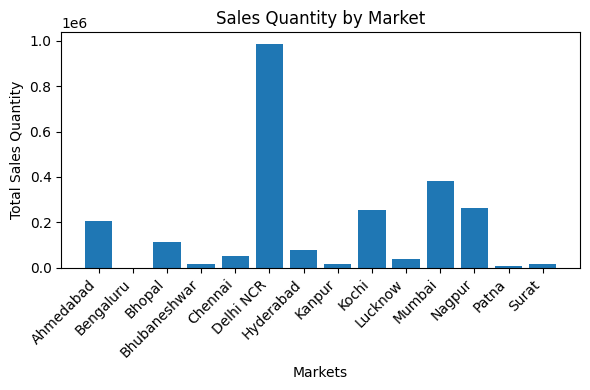

In [ ]:
import matplotlib.pyplot as plt     #forgot to import at the beginning :P


plt.figure(figsize=(6, 4))
plt.bar(sales_by_market.index, sales_by_market.values)
plt.xlabel('Markets')
plt.ylabel('Total Sales Quantity')
plt.title('Sales Quantity by Market')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
revenue_by_market = df.groupby('markets_name')['sales_amount'].sum()

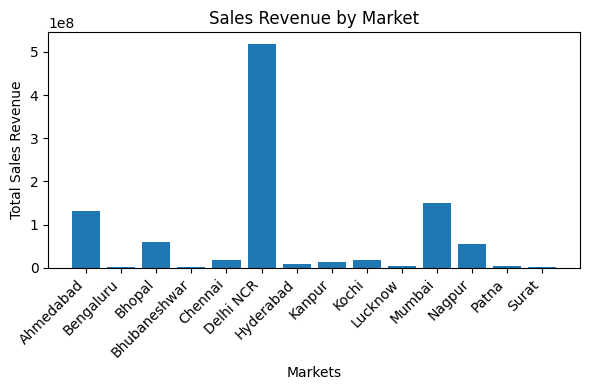

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(revenue_by_market.index, revenue_by_market.values)
plt.xlabel('Markets')
plt.ylabel('Total Sales Revenue')
plt.title('Sales Revenue by Market')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
df = pd.merge(left=transactions, right=date, on='order_date')

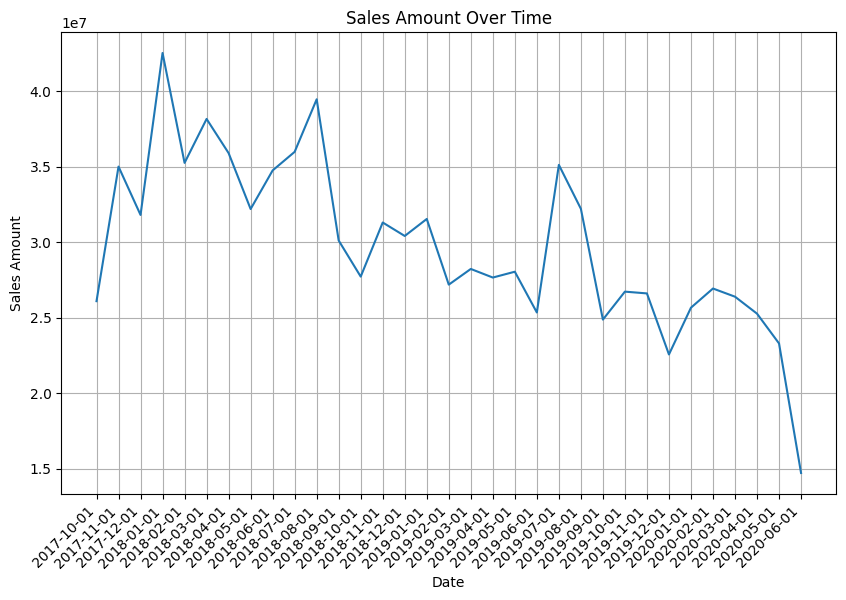

In [ ]:
revenue_by_month_year = df.groupby('cy_date')['sales_amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(revenue_by_month_year.index, revenue_by_month_year.values)

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales Amount Over Time')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,normalised_sales_amt,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR\r,41241,2017-10-01,2017,October,17-Oct\r
1,Prod013,Cus001,Mark001,2017-10-10,240,143560,INR\r,143560,2017-10-01,2017,October,17-Oct\r
2,Prod020,Cus001,Mark001,2017-10-10,140,153019,INR\r,153019,2017-10-01,2017,October,17-Oct\r
3,Prod053,Cus017,Mark011,2017-10-10,10,3014,INR\r,3014,2017-10-01,2017,October,17-Oct\r
4,Prod053,Cus018,Mark011,2017-10-10,1,269,INR\r,269,2017-10-01,2017,October,17-Oct\r


In [ ]:
df = pd.merge(left=transactions, right=customers, on='customer_code')

In [ ]:
df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,normalised_sales_amt,custmer_name,customer_type
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR\r,41241,Surge Stores,Brick & Mortar
1,Prod013,Cus001,Mark001,2017-10-10,240,143560,INR\r,143560,Surge Stores,Brick & Mortar
2,Prod016,Cus001,Mark001,2018-06-28,187,115481,INR\r,115481,Surge Stores,Brick & Mortar
3,Prod020,Cus001,Mark001,2017-10-10,140,153019,INR\r,153019,Surge Stores,Brick & Mortar
4,Prod020,Cus001,Mark001,2017-10-25,47,51005,INR\r,51005,Surge Stores,Brick & Mortar


In [ ]:
top_5_customers = df.groupby('custmer_name')['sales_amount'].sum().sort_values(ascending=False).head(5)


In [ ]:
print(top_5_customers)

custmer_name
Electricalsara Stores    413333588
Electricalslytical        49644189
Excel Stores              49115620
Premium Stores            44906666
Nixon                     43893083
Name: sales_amount, dtype: int64


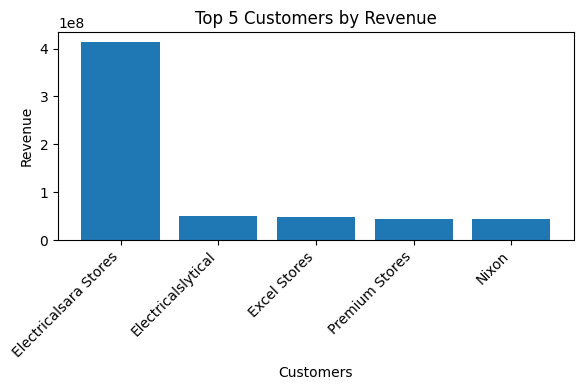

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(top_5_customers.index, top_5_customers.values)
plt.xlabel('Customers')
plt.ylabel('Revenue')
plt.title('Top 5 Customers by Revenue')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

In [ ]:
products.dropna()

,product_code,product_type
0,Prod001,Own Brand\r
1,Prod002,Own Brand\r
2,Prod003,Own Brand\r
3,Prod004,Own Brand\r
4,Prod005,Own Brand\r
...,...,...
274,Prod275,Own Brand\r
275,Prod276,Own Brand\r
276,Prod277,Own Brand\r
277,Prod278,Distribution\r


In [ ]:
df = pd.merge(left=transactions, right=products, on='product_code')

In [ ]:
sums = df['sales_qty'].sum()
print(sums)

2009863


In [ ]:
top_5_products = df.groupby('product_code')['sales_amount'].sum().sort_values(ascending=False).head(5)


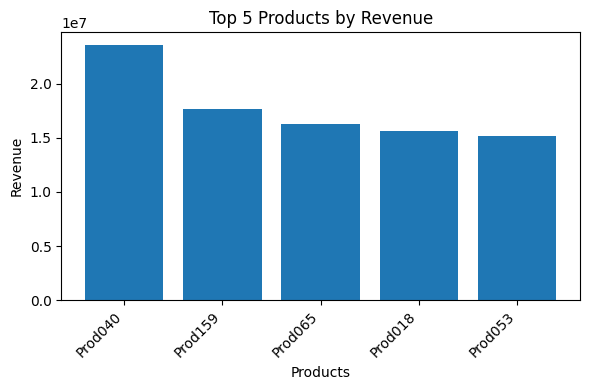

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(top_5_products.index, top_5_products.values)
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.title('Top 5 Products by Revenue')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

One thing to note here is that the above plot is different in my Power BI report. This is because Power BI included the null values since I kept them, while the join function in Python automatically discards the null values.